###pre

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge

import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('./train.csv')

In [ ]:
train_x = train_df.drop(columns = ['TIMESTAMP','PRODUCT_ID', 'Y_Quality','Y_Class'])
train_y = train_df[['Y_Quality','PRODUCT_CODE']]

In [ ]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
print('Done.')

Done.


In [ ]:
train_a = train_x[train_x['PRODUCT_CODE'] == 0]
train_t = train_x[train_x['PRODUCT_CODE'] != 0]

train_a_y = train_y[train_y['PRODUCT_CODE'] == 'A_31']
train_t_y = train_y[train_y['PRODUCT_CODE'] != 'A_31']
train_a_y = train_a_y['Y_Quality']
train_t_y = train_t_y['Y_Quality']

col = train_x.columns
na_a_col = []
na_t_col = []
for i in col:
  if train_a[i].count() == 0:
    na_a_col.append(i)
  if train_t[i].count() == 0:
    na_t_col.append(i)
a_col = []
t_col = []

for i in col:
  if i == 'PRODUCT_CODE' or i == 'LINE' or i == 'Y_Quality':
    continue
  if i not in na_a_col:
    a_col.append(i)
  if i not in na_t_col:
    t_col.append(i)
comm_na_col = []
for i in na_a_col:
  if i in na_t_col:
   comm_na_col.append(i)
train_a.drop(comm_na_col, axis = 1, inplace = True)
train_t.drop(comm_na_col, axis = 1, inplace = True)
train_a.drop(t_col, axis = 1, inplace = True)
train_t.drop(a_col,axis = 1, inplace = True)
print(f"Shape of A_31/T_31 : {train_a.shape} {train_t.shape}")

Shape of A_31/T_31 : (249, 2118) (349, 679)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
train_a = train_a.fillna(0)
train_t = train_t.fillna(0)

In [ ]:
train_t_col = train_t.columns
tmp = []
for i in train_t_col:
  if i == 'LINE' or i == 'PRODUCT_CODE':
    continue
  if len(train_t[i].unique()) <2:
    tmp.append(i)
train_t = train_t.drop(tmp,axis = 1)
print(train_t.shape)

(349, 586)


In [ ]:
train_a_col = train_a.columns
tmp = []
for i in train_a_col:
  if i == 'LINE' or i == 'PRODUCT_CODE':
    continue
  if len(train_a[i].unique()) <2:
    tmp.append(i)
train_a = train_a.drop(tmp,axis = 1)
print(train_a.shape)

(249, 1973)


In [ ]:
test_a = train_a[220:]
test_a_y = train_a_y[220:]
train_a = train_a[:220]
train_a_y = train_a_y[:220]
test_t = train_t[300:]
test_t_y = train_t_y[300:]
train_t = train_t[:300]
train_t_y = train_t_y[:300]

### 라쏘

In [ ]:
RF_a = GradientBoostingRegressor(n_estimators = 1000).fit(train_a, train_a_y)
RF_t = Lasso(alpha = 0.000001).fit(train_t, train_t_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.971e-04, tolerance: 5.291e-07
  model = cd_fast.enet_coordinate_descent(


In [ ]:

tmp = []
for i in RF_t.coef_:
  if i != 0:
    tmp.append(i)
print(len(tmp))

401


In [ ]:
pred_a = RF_a.predict(test_a)
pred_t = RF_t.predict(test_t)

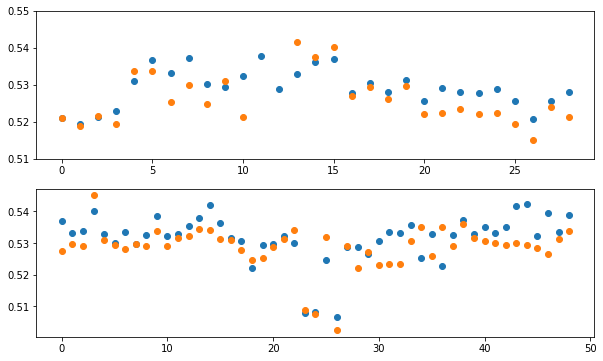

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
plt.scatter(range(len(test_a_y.values)), pred_a)
plt.scatter(range(len(test_a_y.values)), test_a_y.values)
plt.ylim(0.51,0.55)

plt.subplot(2,1,2)
plt.scatter(range(len(test_t_y.values)), pred_t)
plt.scatter(range(len(test_t_y.values)), test_t_y.values)
plt.show()